In [6]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#下記は決定木可視化のためのツール
import graphviz
import pydotplus
from IPython.display import Image
from six import StringIO


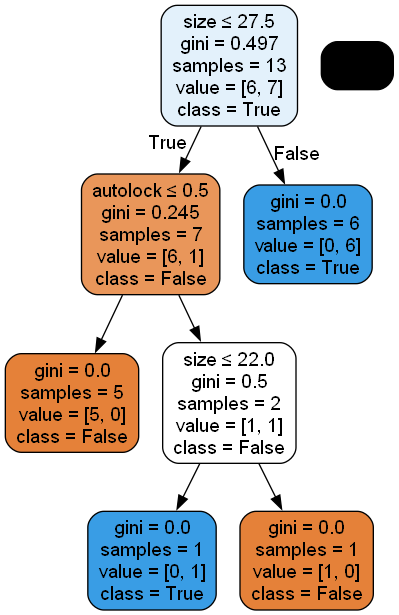

In [7]:
data = pd.DataFrame({
        "buy(y)":[True,True,True,True,True,True,True,False,False,False,False,False,False],
        "high":[4, 5, 3, 1, 6, 3, 4, 1, 2, 1, 1,1,3],
        "size":[30, 45, 32, 20, 35, 40, 38, 20, 18, 20, 22,24,25],
        "autolock":[1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,1,0]
    })
y = data.loc[:,["buy(y)"]]
X = data.loc[:,["high", "size","autolock"]]
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)

dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(clf, out_file=dot_data,  
                     feature_names=["high", "size","autolock"],#編集するのはここ  
                     class_names=["False","True"],#編集するのはここ（なぜFase,Trueの順番なのかは後程触れます）  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())
